# Victor Jun Teruya Uehara
## RA: 21005016

### Atividade 1

* Abrir a imagem DICOM e determinar os valores máximos e mínimos de intensidade na imagem.

In [3]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
im=imageio.imread('PIG_CT.dms')
print('maximum grayscale value',np.max(im))
print('minimum grayscale value', np.min(im))

maximum grayscale value 1162
minimum grayscale value -1024


* Criar função Sigmoid

Text(0, 0.5, 'output image graylevel')

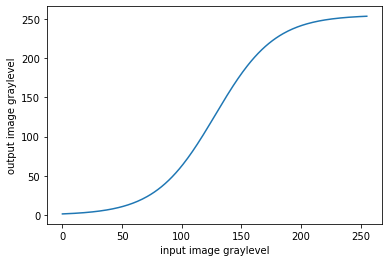

In [4]:
def sigmd(r,w,s):
    #  w = omega, s = sigma
    return 255.0 / (1.0 + np.exp(-(r - w) / s) )

p=np.arange(0,256)
q=sigmd(p,128,25)

plt.plot(p,q)
plt.xlabel('input image graylevel')
plt.ylabel('output image graylevel')

* Criar função rampa

Text(0, 0.5, 'output image graylevel')

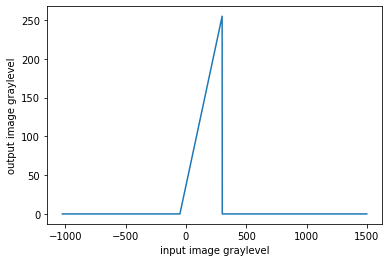

In [5]:
def ramp(r):
    minp = -50
    maxp = 300
    nlevels = 255.0
    a = (nlevels / (maxp - minp))
    ret =  a*(r - minp)
    ret[ret < 0] = 0
    ret[ret > nlevels] = 0
    
    return ret

p=np.arange(-1024,1500)
q=ramp(p)

plt.plot(p,q)
plt.xlabel('input image graylevel')
plt.ylabel('output image graylevel')

* Criar função negativo

Text(0, 0.5, 'output image graylevel')

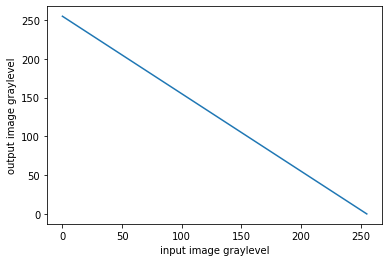

In [6]:
def neg(r):
    return  255 - r

p=np.arange(0, 256)
q=neg(p)

plt.plot(p,q)
plt.xlabel('input image graylevel')
plt.ylabel('output image graylevel')

* plot da imagem

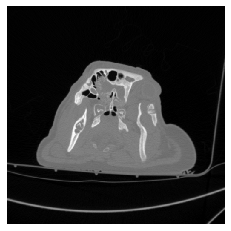

In [7]:
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.show()

* criando intervalos de de janelas

In [8]:
imSig1= sigmd(im, 100,200)
imSig2= sigmd(im, 700,15)
imSig3= sigmd(im, -100,50)

Text(0, 0.5, 'output image graylevel')

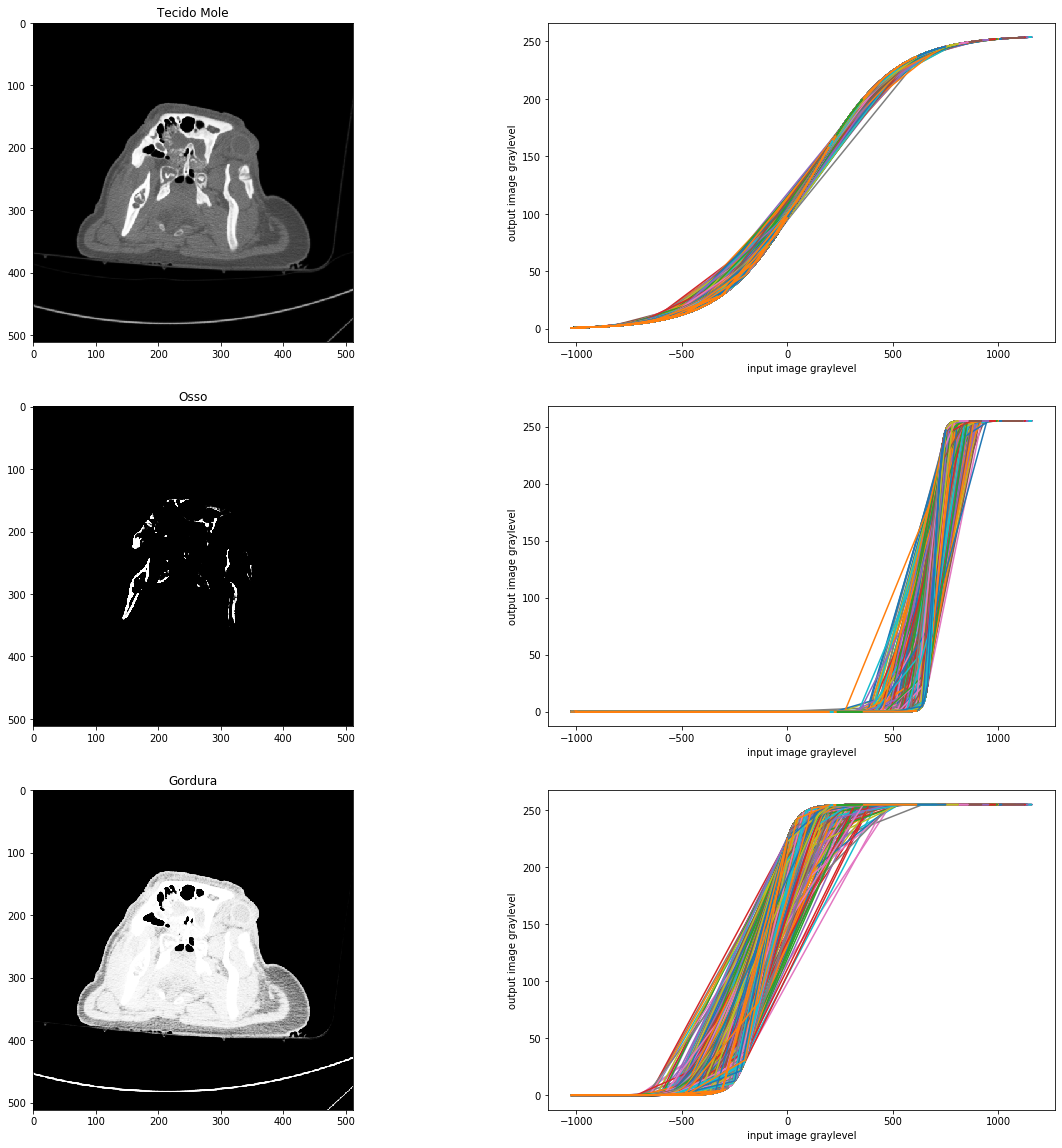

In [11]:
f, axs = plt.subplots(3,1,figsize=(20,20))
plt.subplot(321)
plt.title('Tecido Mole')
plt.imshow(imSig1,cmap='gray')

plt.subplot(322)
plt.plot(im,imSig1)
plt.xlabel('input image graylevel')
plt.ylabel('output image graylevel')

plt.subplot(323)
plt.title('Osso')
plt.imshow(imSig2,cmap='gray')

plt.subplot(324)
plt.plot(im,imSig2)
plt.xlabel('input image graylevel')
plt.ylabel('output image graylevel')

plt.subplot(325)
plt.title('Gordura')
plt.imshow(imSig3,cmap='gray')

plt.subplot(326)
plt.plot(im,imSig3)
plt.xlabel('input image graylevel')
plt.ylabel('output image graylevel')

### Atividade 3

* Criar uma matriz 80 por 80 com valor 20

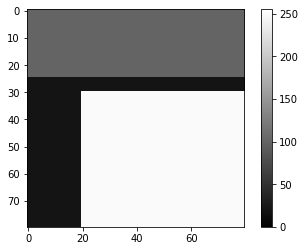

In [12]:
ima = 20*np.ones((80,80),dtype=np.uint8)
l = 0
while l < 25:
    k = 0
    while k < 80:
        ima[l,k] = 100
        k = k + 1
    l = l + 1

l = 79
while l > 29:
    k = 79
    while k > 19:
        ima[l,k] = 250
        k = k - 1
    l = l - 1
    

# Force the image to be displayed with grayscale 0-255
plt.imshow(ima,vmin=0, vmax=255, cmap='gray')
plt.colorbar()

* criar 2 areas, 1 de 2000 (80x25) pixels  e outra de 3000 (50x60) pixels 

hist =  [1400    0    0    0    0    0 2000    0    0    0    0    0    0    0
    0    0    0    0    0 3000]
bins =  [ 20.   31.5  43.   54.5  66.   77.5  89.  100.5 112.  123.5 135.  146.5
 158.  169.5 181.  192.5 204.  215.5 227.  238.5 250. ]


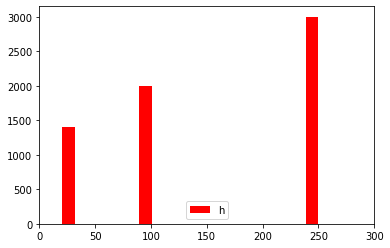

In [13]:
hist,bins = np.histogram(ima.flatten(),20)
print('hist = ',hist)
print('bins = ',bins)

plt.hist(ima.flatten(), 20, color = 'r')
plt.xlim([0,300])
plt.legend(('histogram'), loc = 'lower center')
plt.show()